In [2]:
"""\
# Copyright (C) 2023 Jesús Bautista Villar <jesbauti20@gmail.com>
"""
!python3 --version

Python 3.10.12


In [1]:
import numpy as np
import os
import sys

from tqdm import tqdm

# Graphic tool
import matplotlib.pyplot as plt

# --------------------------------------------------------------------------------------

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from gvf_inv.gvf_traj.gvf_traj_ellipse import gvf_ellipse
from gvf_inv.simulator import simulator

# --------------------------------------------------------------------------------------

E = np.array([[0, 1],[-1, 0]])

In [2]:
# Initial state of the robot
p0 = np.array([[4,0]])
v0 = np.array([4])
phi0 = np.array([0])

x0 = [p0,v0,phi0]

# Generate the trajectory to be followed
a, b = 10, 10
XYoff, alpha = [0, 0], 0

gvf_traj = gvf_ellipse(XYoff,alpha,a,b)

# Generating the simulator class
dt = 0.01

s = 1
ke = 2
kn = 3

sim = simulator(gvf_traj, x0=x0, dt=dt, s=s, ke=ke, kn=kn, A_fd=0.2, omega_fd=np.pi/1.5)

# ----------------------------------------------------------------------
# Execute the simulation given a desired final time stamp
# ----------------------------------------------------------------------
tf = 20

t_list = np.arange(0, tf, dt)
for it in tqdm(range(len(t_list))):
    sim.int_euler()

print(sim.data["n_norm"])

  0%|          | 0/2000 [00:00<?, ?it/s]

100%|██████████| 2000/2000 [00:00<00:00, 7518.80it/s]


[array([15.76401224]), array([15.52946592]), array([15.3010101]), array([15.07851101]), array([14.8618337]), array([14.65084268]), array([14.44540243]), array([14.24537794]), array([14.050635]), array([13.86104062]), array([13.67646324]), array([13.496773]), array([13.32184191]), array([13.151544]), array([12.98575543]), array([12.82435461]), array([12.66722223]), array([12.51424134]), array([12.36529735]), array([12.22027808]), array([12.07907372]), array([11.94157686]), array([11.80768246]), array([11.67728781]), array([11.55029253]), array([11.42659851]), array([11.30610988]), array([11.18873297]), array([11.07437625]), array([10.96295032]), array([10.85436782]), array([10.74854341]), array([10.64539371]), array([10.54483725]), array([10.44679442]), array([10.35118745]), array([10.25794031]), array([10.16697873]), array([10.07823009]), array([9.99162342]), array([9.90708932]), array([9.82455997]), array([9.74396904]), array([9.66525168]), array([9.58834445]), array([9.51318534]), ar

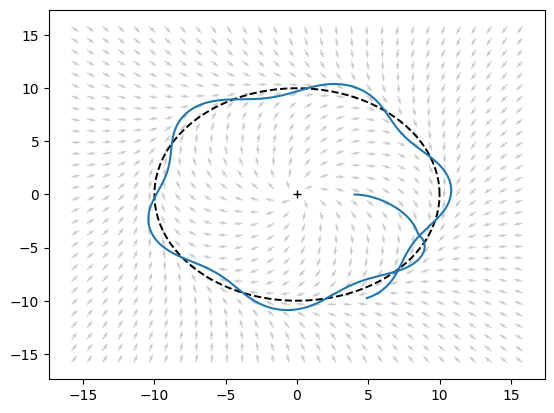

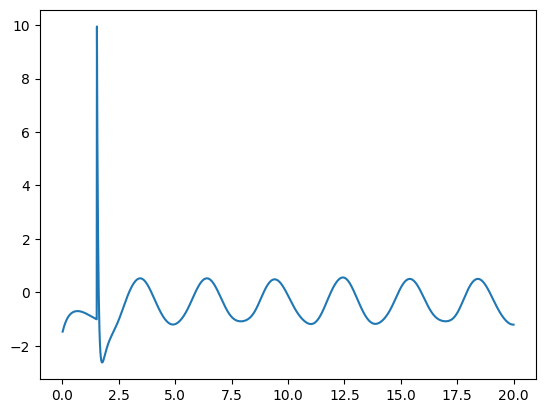

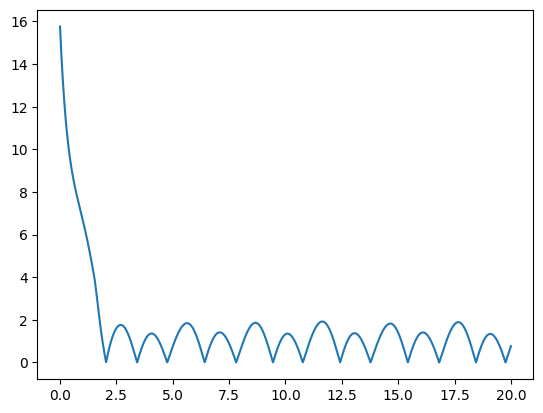

In [3]:
t_data = np.array(sim.data["t"])
p_data = np.array(sim.data["p"])
omega_data = np.array(sim.data["omega"])
nnorm_data = np.array(sim.data["n_norm"])

# ----------------------------------------------------------------------

fig = plt.figure()
ax = fig.subplots()

gvf_traj.vector_field(XYoff, 1000, s, ke)
gvf_traj.draw(fig, ax, lw=1.4)

ax.plot(p_data[:,0,0], p_data[:,0,1])
plt.show()

# ----------------------------------------------------------------------

plt.plot(t_data, omega_data)
plt.show()

# ----------------------------------------------------------------------

plt.plot(t_data, nnorm_data)
plt.show()